In [1]:
import string
from nltk.corpus import stopwords
from nltk.corpus import words
from nltk.tokenize import word_tokenize
import glob
from tqdm import tqdm
from nltk.stem.porter import PorterStemmer
from collections import Counter
from operator import itemgetter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
remove_punctuation_table = str.maketrans('', '', '\'"!.,?:;')
stop_words = set(stopwords.words('english'))

def read_tokens_from_file(file_name):
    with open(file_name) as f:
        doc = f.read()
        # Tokenize
        tokens = word_tokenize(doc)

        # Remove punctuations
        tokens = [w.translate(remove_punctuation_table) for w in tokens]

        # Remove short words
        # Remove word including number characters
        # Make the word into lowercase
        tokens = [w.lower() for w in tokens if len(w) > 1 and w.isalpha()]

        # Filter out stop words
        tokens = [w for w in tokens if not w in stop_words]

        # Stemming
        porter = PorterStemmer()
        tokens = [porter.stem(w) for w in tokens]

        return tokens

In [3]:
vocab_set = set()
file_list = glob.glob('./data/train/neg/*.txt')
file_list = file_list + glob.glob('./data/train/pos/*.txt')

vocab_counter = Counter()

for file_name in tqdm(file_list):
    tokens = read_tokens_from_file(file_name)
    vocab_counter.update(tokens)

vocab_occurrence_list = list(vocab_counter.items())

# Sort vocab_occurrence_list with 
#    the number of occurrence of each word and
#    lexicographic orders of word
vocab_occurrence_list = sorted(vocab_occurrence_list, key=itemgetter(0))
vocab_occurrence_list = sorted(vocab_occurrence_list, key=itemgetter(1))

# Write the sorted vocab occurrence list into a file
with open('./vocab/vocab_counter.txt', 'w') as f:
    for k, c in vocab_occurrence_list:
        print ("%d, %s" % (c, k), file=f)

# Remove rare words (in this case, the word which appeared less than 2 times)        
min_occurrence = 2
vocab_list = [k for k, c in vocab_occurrence_list if c >= min_occurrence]

with open('./vocab/vocab.txt', "w") as f:
    for term in  vocab_list:
        print (term, file=f)

100%|██████████| 25000/25000 [01:29<00:00, 278.69it/s]


In [4]:
print("The number of vocabularies: ", len(vocab_counter))
print("30 Most common words")
most_common = vocab_counter.most_common(30)
print(most_common)

The number of vocabularies:  52826
30 Most common words
[('br', 101871), ('movi', 50895), ('film', 47472), ('nt', 33378), ('one', 27028), ('like', 22281), ('time', 15633), ('good', 15009), ('make', 14573), ('get', 14081), ('charact', 14050), ('see', 13944), ('watch', 13830), ('would', 13389), ('stori', 12938), ('even', 12860), ('realli', 11714), ('scene', 10469), ('well', 10059), ('show', 9782), ('look', 9756), ('much', 9690), ('end', 9490), ('could', 9386), ('peopl', 9356), ('bad', 9169), ('also', 9118), ('go', 9108), ('great', 9102), ('first', 8907)]


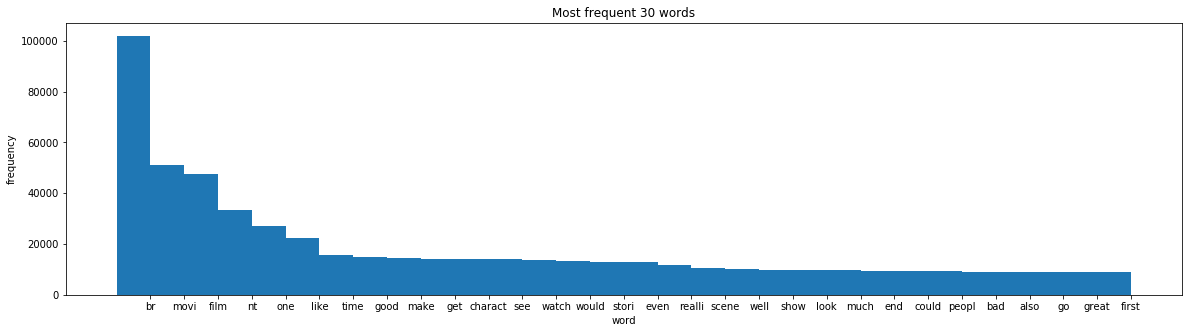

In [7]:
# plt.bar(most_common.keys(), most_common.values())
# plt.show()
plt.rcParams["figure.figsize"] = (20,5)
labels, values = zip(*most_common)

indexes = np.arange(len(labels))
width = 1

plt.bar(indexes, values, width)
plt.xticks(indexes + width * 0.5, labels)
plt.title('Most frequent 30 words')
plt.ylabel('frequency')
plt.xlabel('word')
   
plt.show()

In [6]:
print("The number of vocabularies after removing non-frequent words:")
print(len(vocab_list))

The number of vocabularies after removing non-frequent words:
30819
